In [1]:
!pip install sea
!pip install kneed
!pip install mpl_toolkits
!pip install pandasql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 40.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 110.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.0/490.0 KB 49.4 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.46.0
    Uninstalling grpcio-1.46.0:
      Successfully uninstalled grpcio-1.46.0
ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [2]:
import sqlalchemy as sql
import psycopg2 
import pandas.io.sql as sqlio
import pandas as pd
from functools import reduce
import sqlalchemy
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install flask_sqlalchemy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 22.9 MB/s eta 0:00:00
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dbt-core 1.1.0 requires Jinja2==2.11.3, but you have jinja2 3.1.2 which is incompatible.


In [4]:
import sea
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from pandasql import sqldf

In [5]:
engine = sqlalchemy.create_engine('postgresurl')

In [6]:
query = ''' with equity_avg as (
select user_account , percentile_cont(0.5) within group (order by avg_equity) as median_equity
from (
select user_account, sum(max_equity_month)/count(month_of) as avg_equity
from (
select a.user_account,date_trunc('month', asof) as month_of, max(db.equity) as max_equity_month
from equity db 
left join user A on a.id = db.account_id
and asof >= current_date - 90
and db.equity > 0
and a.user_account is not NULL
group by 1, 2
)query1
group by 1
)query2
group by 1
),

median_transactions as (
select transactions.account, count(transactions.id)/count(distinct date_trunc('day', order_date)) as transactions_per_day
from transactions 
left join user A on a.user_account = transactions.account 
left join new_shared ast ON ast.id::uuid=transactions.asset_id::uuid
where order_date > current_date - 180
and order_date is not NULL
and ast.class = 'us_equity'
and transactions.account not in ('1234', '3455)
group by 1

)


select mo.account, mo.transactions_per_day, ea.median_equity
from median_transactions mo
left join equity_avg ea on ea.user_account = mo.account 


'''

In [7]:
df = pd.read_sql_query(query, engine)
df = df.dropna()

In [8]:
df['transactions_per_day'].max()

5025

In [21]:
df.describe()

,orders_per_day,median_equity
count,3534.000000,3.534000e+03
mean,19.380872,1.963469e+04
std,96.549132,5.523937e+04
min,1.000000,1.000000e-02
25%,1.000000,1.614821e+02
50%,2.000000,2.012828e+03
75%,5.000000,2.106954e+04
max,2353.000000,1.176339e+06


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


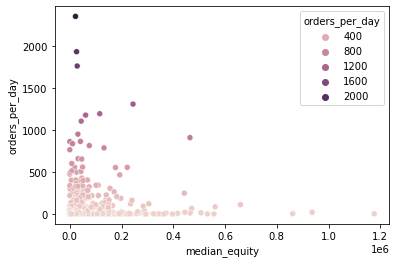

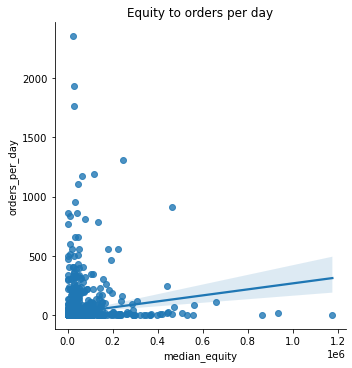

In [22]:
#Plotting to see where the distribution lies
sns.scatterplot('median_equity', 'transactions_per_day', hue='transactions_per_day', data=df);
sns.lmplot('median_equity', 'transactions_per_day', data=df);
plt.title('Equity to transactions per day');

In [23]:
df = df.drop(df.index[df['transactions_per_day'] == df['transactions_per_day'].max()]) 

In [24]:
df = df.drop(df.index[df['median_equity'] == df['median_equity'].max()]) 

In [25]:
df = df.drop(df.index[df['median_equity'] == df['median_equity'].max()]) 

In [26]:
df = df.drop(df.index[df['median_equity'] == df['median_equity'].max()]) 
df = df.drop(df.index[df['median_equity'] == df['median_equity'].max()]) 

#### Using the above lines we cleaned the dataset from the 5 outliers that we see outside the density of the scatter plots above that could prevent us from getting defining clusters accurately. 

In [27]:
df['median_equity'].nlargest(2)

2526    561447.299525
1172    557151.807000
Name: median_equity, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


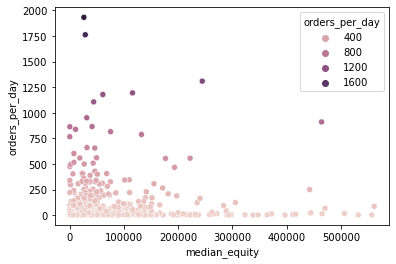

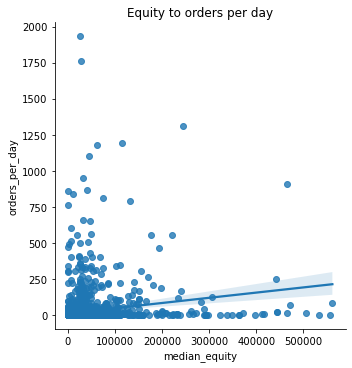

In [28]:
#Plotting to see where the distribution lies
sns.scatterplot('median_equity', 'transactions_per_day', hue='transactions_per_day', data=df);
sns.lmplot('median_equity', 'transactions_per_day', data=df);
plt.title('Equity to transactions per day');

In [29]:
data = df.reset_index().drop('index',axis=1)

#### Feature scaling for a ML model is very important and standardizing is one of the methods of doing so. We will standardize all variables in the dataset to get them around the same scale between 0-1

In [30]:
col_names = ['transactions_per_day', 'median_equity']
features = data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()
data2 = scaled_features
data2.head()

,orders_per_day,median_equity
0,-0.189277,-0.365522
1,-0.177944,-0.211713
2,-0.189277,-0.404456
3,-0.177944,-0.366849
4,3.822554,0.157480


#### Checking for dataset variance by each component. We will do so by using the Principal Component Analysis(PCA) test. PCA is usually done to check which of the components in a dataset cover maximum of the variance, but in this case, we are using it to check by how much do the components differ. 
#### Greater the variance, greater is the impact of the component on the model. 

#### In this case as we see below, the variance doesn't differ by a lot, only 0.10, hence both componenets will have a similar quantitative impact on the model, which is good news


Text(0, 0.5, 'Inertia')

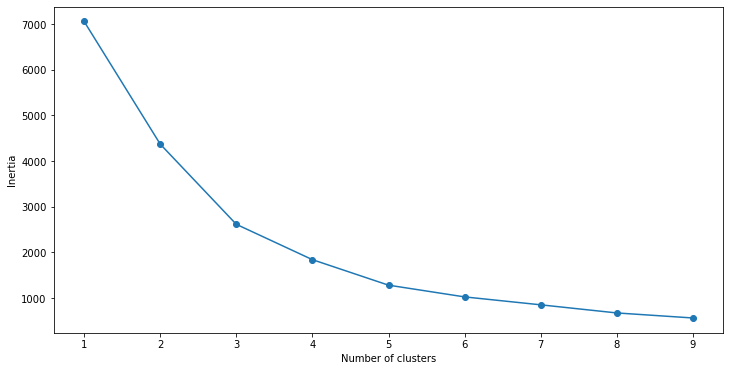

In [31]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data2)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### Building the model with the above components, and a cluster size of 3

In [33]:
# First, build a model with 3 clusters

kmeans = KMeans( n_clusters = 3, init='k-means++')
kmeans.fit(data2)

# Now, print the silhouette score of this model

print(silhouette_score(data2, kmeans.labels_, metric='euclidean'))

0.8707093867840998


In [127]:
data2.head()

,orders_per_day,median_equity,label
0,-0.189277,-0.365522,0
1,-0.177944,-0.211713,0
2,-0.189277,-0.404456,0
3,-0.177944,-0.366849,0
4,3.822554,0.157480,0


In [65]:
model = KMeans(n_clusters=3)

#### A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm. Silhouette scores range from -1 to +1. The higher the silhouette score, the better the model. This is a really good silhouette score of the model.

#### Let's visualize what the cluster looks like

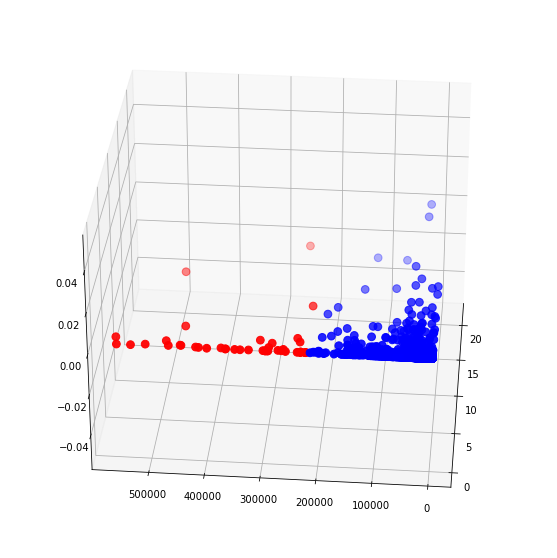

In [64]:
clusters = kmeans.fit_predict(df.iloc[:,1:])
data2["label"] = clusters

fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2["transactions_per_day"][data2.label == 0], data["median_equity"][data2.label == 0], c='blue', s=60)

ax.scatter(data2["transactions_per_day"][data2.label == 1], data["median_equity"][data2.label == 1], c='red', s=60)
ax.scatter(data2["transactions_per_day"][data2.label == 2], data["median_equity"][data2.label == 2], c='blue', s=60)

ax.view_init(30, 185)
plt.show()

In [69]:
df['clusters'] = clusters

In [71]:
df.tail()

,account,orders_per_day,median_equity,clusters
3703,959102742,14,1361.002835,0
3705,960156629,3,105977.087500,2
3706,960526187,84,81986.150000,2
3707,961124237,2,6216.057500,0
3708,961142276,56,116092.941752,2


#### The above graph shows us how congested the clusters are

In [138]:
avg_df = df.groupby(['clusters'], as_index=False).mean()

<AxesSubplot:xlabel='clusters', ylabel='orders_per_day'>

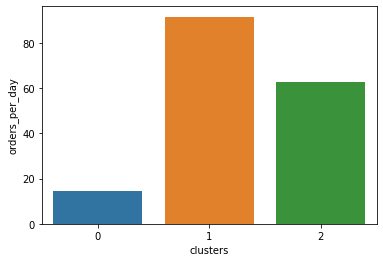

In [139]:
sns.barplot(x='clusters',y='transactions_per_day',data=avg_df)

<AxesSubplot:xlabel='clusters', ylabel='median_equity'>

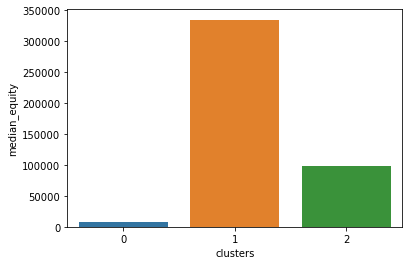

In [75]:
sns.barplot(x='clusters',y='median_equity',data=avg_df)

In [76]:
df_sort2 = avg_df.sort_values(['transactions_per_day','median_equity'],ascending=[False, False])

#### Grouping by distinct cluster gives us a count of the following:

In [79]:
df.groupby(['clusters']).size()

clusters
0    3246
1      43
2     240
dtype: int64

Conclusion:
Clustering with a Kmeans algorithm and the recommended number of clusters (3) leads us giving thresholds as seen below.

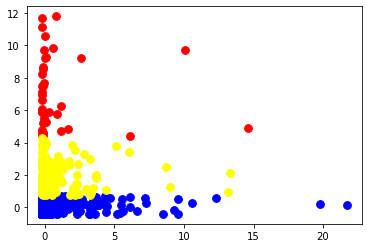

In [128]:
filtered_label1 = df[clusters == 1]
filtered_label2 = df[clusters == 2]
 
#Plotting the results

plt.scatter(data2["transactions_per_day"][data2.label == 0], data2["median_equity"][data2.label == 0], c='blue', s=60)
plt.scatter(data2["transactions_per_day"][data2.label == 1], data2["median_equity"][data2.label == 1], c='red', s=60)
plt.scatter(data2["transactions_per_day"][data2.label == 2], data2["median_equity"][data2.label == 2], c='yellow', s=60)

plt.show()

In [136]:
mean_df = df.groupby(['clusters'], as_index=False).mean()


In [137]:
mean_df

,clusters,orders_per_day,median_equity
0,0,14.472274,8545.985063
1,1,91.488372,334683.963850
2,2,62.862500,98340.817469
